# Importing the Libraries

In [1]:
!pip install geopy
!pip install lightgbm

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import requests
import calendar

from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
from geopy.geocoders import Nominatim
from urllib3.util.retry import Retry
from requests.packages.urllib3.util.retry import Retry
from geopy.exc import GeocoderUnavailable, GeocoderTimedOut

from urllib.request import urlopen
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense

In [2]:
donor_16_19 = pd.read_excel(r'C:\Users\HP\Documents\Course work\Project\2016-2019.xlsx')

In [3]:
donor_19_21 = pd.read_excel(r'C:\Users\HP\Documents\Course work\Project\2019-2021.xlsx')

In [4]:
donor_21_23 = pd.read_excel(r'C:\Users\HP\Documents\Course work\Project\2021-present.xlsx')

In [386]:
# Merging the datasets
merged_donors_df = pd.concat([donor_16_19, donor_19_21, donor_21_23], ignore_index=True)

# Exploring the Dataset

In [387]:
# Viewing the first few rows of the dataset
merged_donors_df.head(5)

,Payment Number,Contact ID,Salesforce Number,Payment Source Code: Source Code,Salutation,Payment Amount Received Currency,Payment Amount Received,Payment Amount Currency,Payment Amount,Payment Date,...,Primary Campaign Source: Campaign Name.1,Primary Campaign Source: Parent Campaign: Campaign Name,Payment Source Code: Type of Income,Contact Record Type,Opportunity Record Type,Gender,Primary Language,Age,Last Gift Amount,Recruitment Source.1
0,PMT-2027230,0034J00000fAOP5,SF-025146,KNOREG,Mrs,GBP,5.0,GBP,5.0,2018-12-07,...,NaN,NaN,Regular Giving,Individual,Donation,Female,NaN,NaN,5.0,Phone Enquiry
1,PMT-2796235,0034J00000fAOP5,SF-025146,KNOREG,Mrs,GBP,5.0,GBP,5.0,2017-04-05,...,NaN,NaN,Regular Giving,Individual,Donation,Female,NaN,NaN,5.0,Phone Enquiry
2,PMT-3017483,0034J00000fAOP5,SF-025146,KNOREG,Mrs,GBP,5.0,GBP,5.0,2018-03-05,...,NaN,NaN,Regular Giving,Individual,Donation,Female,NaN,NaN,5.0,Phone Enquiry
3,PMT-3017724,0034J00000fAOP5,SF-025146,KNOREG,Mrs,GBP,5.0,GBP,5.0,2016-10-05,...,NaN,NaN,Regular Giving,Individual,Donation,Female,NaN,NaN,5.0,Phone Enquiry
4,PMT-3026573,0034J00000fAOP5,SF-025146,KNOREG,Mrs,GBP,5.0,GBP,5.0,2019-06-07,...,NaN,NaN,Regular Giving,Individual,Donation,Female,NaN,NaN,5.0,Phone Enquiry


In [388]:
# Viewing the number of rows and columns in the dataset
merged_donors_df.shape

(884982, 36)

In [389]:
# To get a concise summary of the dataframe
merged_donors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884982 entries, 0 to 884981
Data columns (total 36 columns):
 #   Column                                                   Non-Null Count   Dtype         
---  ------                                                   --------------   -----         
 0   Payment Number                                           884982 non-null  object        
 1   Contact ID                                               884982 non-null  object        
 2   Salesforce Number                                        884982 non-null  object        
 3   Payment Source Code: Source Code                         884953 non-null  object        
 4   Salutation                                               660462 non-null  object        
 5   Payment Amount Received Currency                         884982 non-null  object        
 6   Payment Amount Received                                  884982 non-null  float64       
 7   Payment Amount Currency               

In [390]:
# Descriptive Statistical Analysis: summarize the central tendancy and shape of the dataset
merged_donors_df.describe()

,Payment Amount Received,Payment Amount,Total Gifts Last Year,Total Gifts Two Years Ago,Total Number of Gifts,Age,Last Gift Amount
count,884982.000000,884981.000000,884982.000000,884982.000000,884982.000000,1513.000000,881325.000000
mean,216.976333,39.991172,69.101284,213.293849,176.827980,25.399868,39.687378
std,2305.613018,1759.502400,1897.160891,1580.407518,789.980276,17.646647,1216.086383
min,-180.000000,-7753.170000,-3.000000,0.000000,0.000000,1.000000,-2500.000000
25%,3.840000,3.840000,0.000000,0.000000,17.000000,9.000000,2.500000
50%,5.000000,5.000000,0.000000,0.000000,66.000000,23.000000,5.000000
75%,12.500000,10.000000,15.000000,50.000000,134.000000,39.000000,10.000000
max,800000.000000,600000.000000,800000.000000,316233.120000,7780.000000,65.000000,445014.600000


In [391]:
# Checking which columns contain missing values
merged_donors_df.isnull().sum()

Payment Number                                                  0
Contact ID                                                      0
Salesforce Number                                               0
Payment Source Code: Source Code                               29
Salutation                                                 224520
Payment Amount Received Currency                                0
Payment Amount Received                                         0
Payment Amount Currency                                         1
Payment Amount                                                  1
Payment Date                                                    0
Total Gifts Last Year Currency                                  0
Total Gifts Last Year                                           0
Last Gift Date                                              50838
Total Gifts Two Years Ago Currency                              0
Total Gifts Two Years Ago                                       0
Total Numb

In [392]:
# Extract the "Payment Source code: Type of income" column

payment_source_column = merged_donors_df.iloc[:, 28]

In [393]:
# Create a list of the income types based on my objectives (Cash, Regular Giving, and Supporter Led)

income_types = ['Cash', 'Regular Giving', 'Supporter Led']

In [640]:
# Filter rows based on the income types list
income_donors_df = merged_donors_df[payment_source_column.isin(income_types)]

In [641]:
# Viewing the number of rows and columns in the dataset
income_donors_df.shape

(361046, 36)

In [642]:
# Checking which columns contain missing values
print(income_donors_df.isnull().sum())

Payment Number                                                  0
Contact ID                                                      0
Salesforce Number                                               0
Payment Source Code: Source Code                                0
Salutation                                                  88223
Payment Amount Received Currency                                0
Payment Amount Received                                         0
Payment Amount Currency                                         0
Payment Amount                                                  0
Payment Date                                                    0
Total Gifts Last Year Currency                                  0
Total Gifts Last Year                                           0
Last Gift Date                                               9585
Total Gifts Two Years Ago Currency                              0
Total Gifts Two Years Ago                                       0
Total Numb

In [643]:
income = income_donors_df

In [644]:
# Drop columns that are not required
income = income.drop(['Payment Amount Received Currency', 'Payment Amount Received', 
                      'Total Gifts Last Year Currency', 'Total Gifts Last Year', 'Last Gift Date', 
                      'Total Gifts Two Years Ago Currency', 'Total Gifts Two Years Ago', 
                      'Total Number of Gifts', 'Primary Campaign Source: Campaign Name', 
                      'Primary Campaign Source: Campaign Name.1', 'Primary Campaign Source: Event Code: Event Code', 
                      'Primary Campaign Source: Parent Campaign: Campaign Name', 'Opportunity Record Type',
                      'Primary Language', 'Age' ], axis=1)

In [ ]:
# Create a custom session with a retry mechanism
session = requests.Session()
retry_strategy = Retry(total=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry_strategy)
session.mount("https://", adapter)

# Create a geolocator without passing the session parameter
geolocator = Nominatim(user_agent="myGeocoder")

# Define the function to fill missing countries
def fill_missing_countries(row):
    city = row['Mailing City']
    country = row['Mailing Country (text only)']
    
    if pd.isnull(country):
        try:
            location = geolocator.geocode(city, timeout=5)
            if location:
                return location.address.split(",")[-1].strip()
        except (GeocoderUnavailable, GeocoderTimedOut) as e:
            print(f"Geocoding error for {city}: {e}")
            return None
    
    return country

# # Apply the function to fill missing countries
# Top_3_challenge_events['Mailing Country'] = Top_3_challenge_events.apply(fill_missing_countries, axis=1)

# print(Top_3_challenge_events)
# Fill missing values in 'Mailing Country (text only)' based on 'Mailing City'
income['Mailing Country (text only)'] = income.apply(fill_missing_countries, axis=1)

In [645]:
# To fill in the empty cells in the gender column, we will map it with their corresponding salutation, if available

# Creating a dictionary that maps salutations to genders
salutation_to_gender = {
    "Mr": "Male",
    "Mr.": "Male",
    "Master": "Male",
    "Mrs": "Female",
    "Mrs.": "Female",
    "Miss": "Female",
    "Ms": "Female",
    "Ms.": "Female",
    "Sir": "Male",
    
}

In [646]:
# Function to update gender from salutation
def update_gender(row):
    if pd.isnull(row['Gender']) and row['Salutation'] in salutation_to_gender:
        return salutation_to_gender[row['Salutation']]
    else:
        return row['Gender']

In [647]:
# Applying the function to each row
income['Gender'] = income.apply(update_gender, axis=1)

In [648]:
# Filling the NaN values in the 'Recruitment Source.1' column 
# with the corresponding values from the 'Recruitment Source' column. 
# The fillna() function does not modify the original DataFrame by default, 
# so we assign the result back to the 'Recruitment Source.1' column to update it.

income['Recruitment Source.1'] = income['Recruitment Source.1'].fillna(income['Recruitment Source'])


In [649]:
# Drop rows with NaN values in either 'Mailing City' or 'Mailing Country (text only)' columns
city_country_mapping_df = income.dropna(subset=['Mailing City', 'Mailing Country (text only)'])

# Create a dictionary that maps each city to its corresponding country
city_country_mapping = dict(zip(city_country_mapping_df['Mailing City'], city_country_mapping_df['Mailing Country (text only)']))

# Define a function to fill NaN values in 'Mailing Country (text only)' based on 'Mailing City'
def fill_country(row):
    if pd.isnull(row['Mailing Country (text only)']) and row['Mailing City'] in city_country_mapping:
        return city_country_mapping[row['Mailing City']]
    else:
        return row['Mailing Country (text only)']

# Apply the function to fill NaN values
income['Mailing Country (text only)'] = income.apply(fill_country, axis=1)

In [650]:
income['Mailing Country (text only)'] = income['Mailing Country (text only)'].str.upper()
income['Mailing City'] = income['Mailing City'].str.upper()

In [651]:
# Replacing the null values in Gender with unknown as they contain a high percentages of missing values.
income['Gender'].fillna('Unknown', inplace=True)

In [652]:
# Replacing the null values in Recruitment Source.1 with Not Provided as they contain a high percentages of missing values.
income['Recruitment Source.1'].fillna('Not Provided', inplace=True)

In [653]:
# Drop columns 'Salutation', 'Recruitment Source', 'Mailing Street', 
#'Mailing State/Province', 'Source Code: Source Code', 'House Number & Street',
#'City', 'State', 'Postal Code' and 'Country'
income = income.drop(['Salutation', 'Recruitment Source', 'Mailing Street', 'Mailing State/Province', 'Source Code: Source Code'], axis=1)

In [654]:
# Drop rows with missing values in 'Mailing Address', 'Mailing City' and Mailing Zip/Postal Code'
income = income.dropna(subset=['Mailing Address','Mailing Country (text only)','Mailing Zip/Postal Code','Mailing City'])

In [655]:
income = income.dropna(subset=['Last Gift Amount'])

In [656]:
print(income.isnull().sum())

Payment Number                         0
Contact ID                             0
Salesforce Number                      0
Payment Source Code: Source Code       0
Payment Amount Currency                0
Payment Amount                         0
Payment Date                           0
Mailing Address                        0
Mailing City                           0
Mailing Zip/Postal Code                0
Mailing Country (text only)            0
Payment Source Code: Type of Income    0
Contact Record Type                    0
Gender                                 0
Last Gift Amount                       0
Recruitment Source.1                   0
dtype: int64


In [657]:
income_donors_df = income

In [658]:
income_donors_df.shape

(285821, 16)

In [659]:
income_donors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285821 entries, 0 to 884981
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Payment Number                       285821 non-null  object        
 1   Contact ID                           285821 non-null  object        
 2   Salesforce Number                    285821 non-null  object        
 3   Payment Source Code: Source Code     285821 non-null  object        
 4   Payment Amount Currency              285821 non-null  object        
 5   Payment Amount                       285821 non-null  float64       
 6   Payment Date                         285821 non-null  datetime64[ns]
 7   Mailing Address                      285821 non-null  object        
 8   Mailing City                         285821 non-null  object        
 9   Mailing Zip/Postal Code              285821 non-null  object        
 

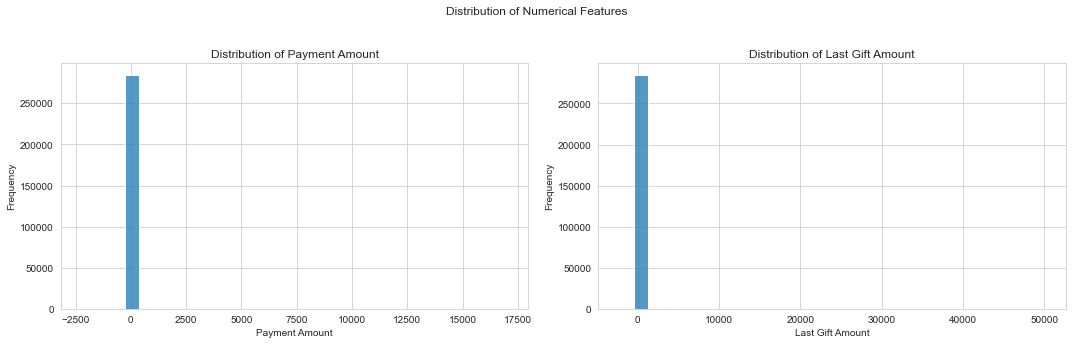

In [660]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# List of numerical and categorical columns
numerical_cols = ['Payment Amount', 'Last Gift Amount']
categorical_cols = ['Payment Source Code: Source Code', 'Payment Amount Currency', 'Mailing Country (text only)', 
                     'Payment Source Code: Type of Income', 'Contact Record Type', 'Gender', 'Recruitment Source.1']
# Create subplots for numerical columns
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 5))
fig.suptitle('Distribution of Numerical Features')
for ax, col in zip(axes, numerical_cols):
    sns.histplot(income_donors_df[col], bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

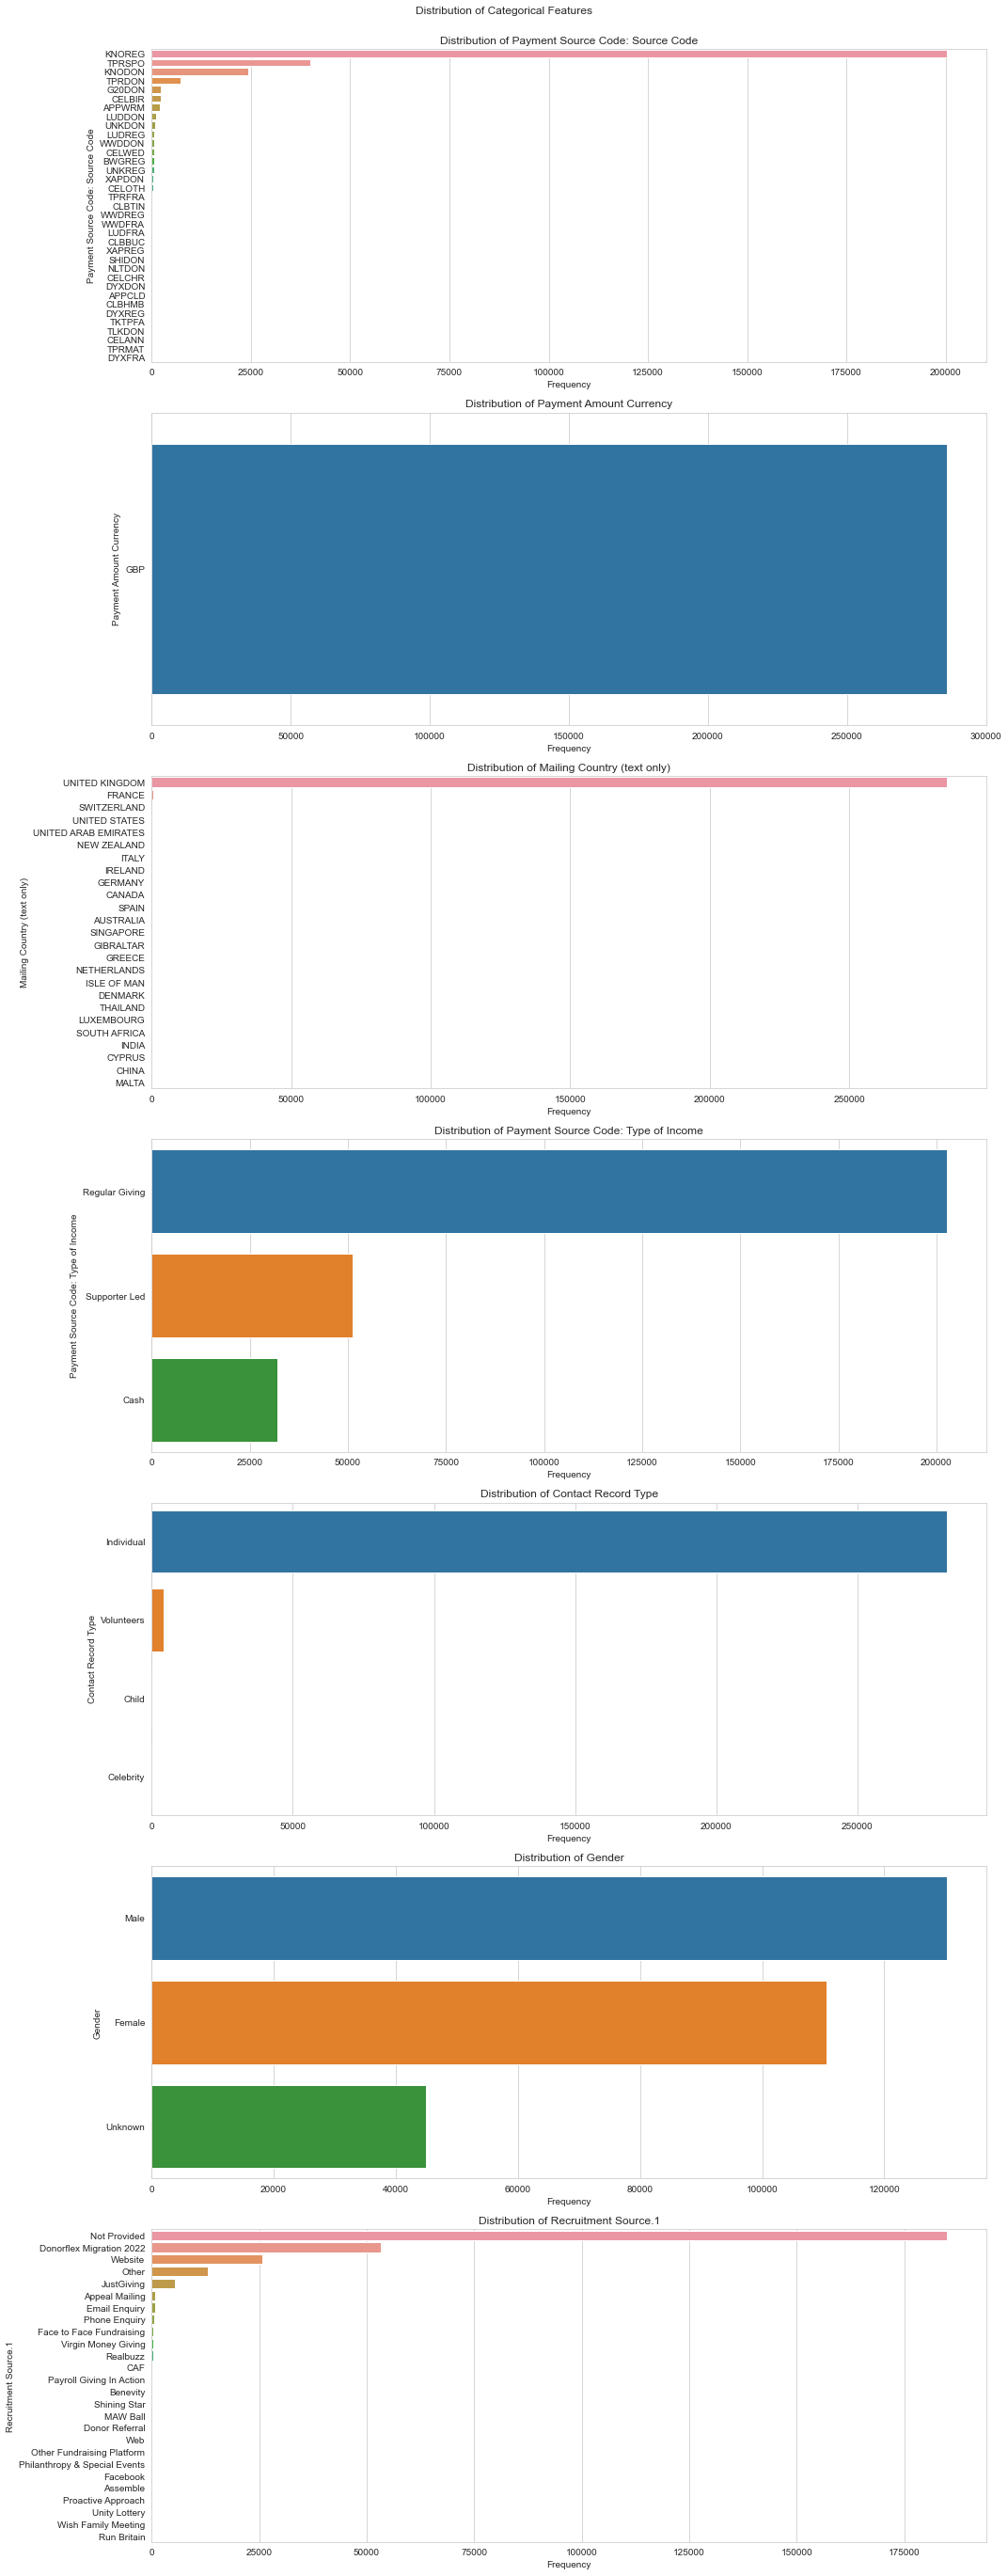

In [661]:
# Create subplots for categorical columns
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(15, 40))
fig.suptitle('Distribution of Categorical Features')

for ax, col in zip(axes, categorical_cols):
    sns.countplot(data=income_donors_df, y=col, ax=ax, order=income_donors_df[col].value_counts().index)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

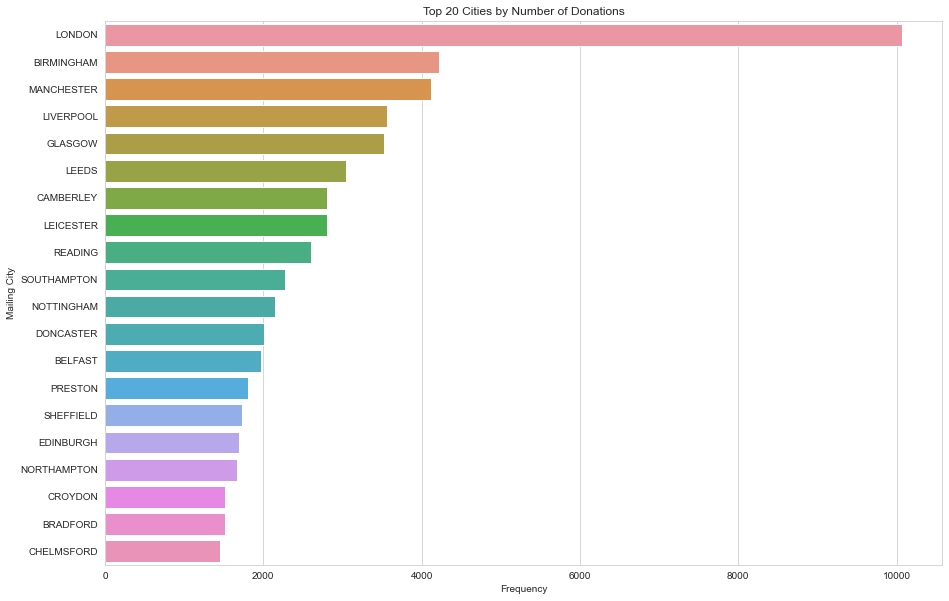

In [662]:
# Plot the distribution of donations based on the 'Mailing City' feature
plt.figure(figsize=(15, 10))
sns.countplot(data=income_donors_df, y='Mailing City', order=income_donors_df['Mailing City'].value_counts().iloc[:20].index)
plt.title('Top 20 Cities by Number of Donations')
plt.xlabel('Frequency')
plt.ylabel('Mailing City')
plt.show()

In [664]:
# Convert 'Payment Date' to datetime object
income_donors_df['Payment Date'] = pd.to_datetime(income_donors_df['Payment Date'])

# Check data types to confirm the conversion
income_donors_df.dtypes


Payment Number                                 object
Contact ID                                     object
Salesforce Number                              object
Payment Source Code: Source Code               object
Payment Amount Currency                        object
Payment Amount                                float64
Payment Date                           datetime64[ns]
Mailing Address                                object
Mailing City                                   object
Mailing Zip/Postal Code                        object
Mailing Country (text only)                    object
Payment Source Code: Type of Income            object
Contact Record Type                            object
Gender                                         object
Last Gift Amount                              float64
Recruitment Source.1                           object
dtype: object

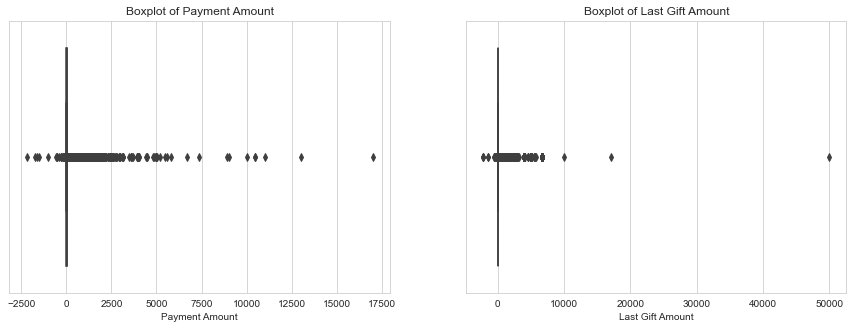

In [665]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the visualizations
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the distribution for 'Payment Amount'
sns.boxplot(x=income_donors_df_encoded['Payment Amount'], ax=axes[0])
axes[0].set_title('Boxplot of Payment Amount')

# Plot the distribution for 'Last Gift Amount'
sns.boxplot(x=income_donors_df_encoded['Last Gift Amount'], ax=axes[1])
axes[1].set_title('Boxplot of Last Gift Amount')

plt.show()

In [666]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for 'Payment Amount'
df_filtered_payment = remove_outliers(income_donors_df, 'Payment Amount')

# Remove outliers for 'Last Gift Amount'
df_filtered = remove_outliers(df_filtered_payment, 'Last Gift Amount')

# Display the shape of the dataset before and after outlier removal
original_shape = income_donors_df.shape
filtered_shape = df_filtered.shape

print(f"Original shape of the dataset: {original_shape}")
print(f"Shape of the dataset after outlier removal: {filtered_shape}")

Original shape of the dataset: (285821, 16)
Shape of the dataset after outlier removal: (248495, 16)


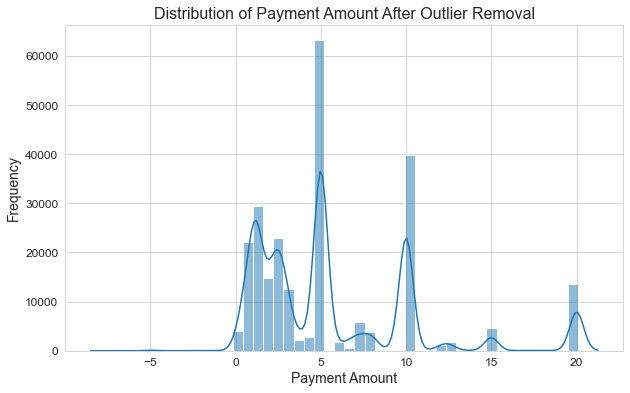

In [669]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the visualizations
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the distribution for 'Payment Amount' in the filtered DataFrame
sns.histplot(df_filtered['Payment Amount'], bins=50, kde=True)

# Customize the plot
plt.title('Distribution of Payment Amount After Outlier Removal', fontsize=16)
plt.xlabel('Payment Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


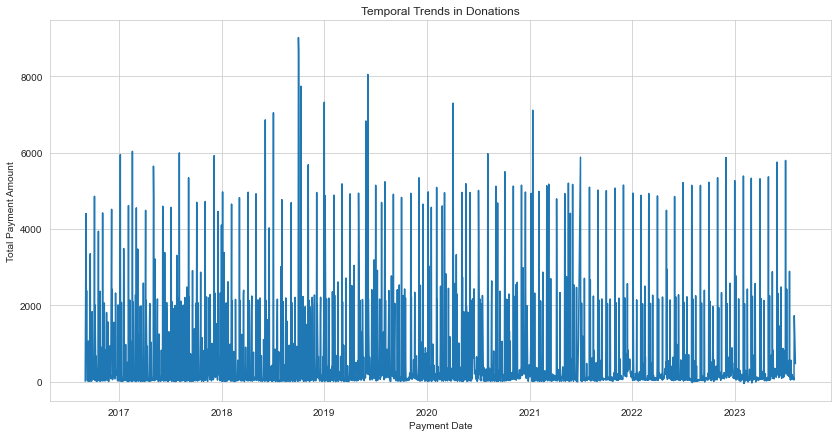

In [670]:
# Group the data by 'Payment Date' and sum the 'Payment Amount' to see the temporal trends in donations
donations_by_date = df_filtered.groupby('Payment Date')['Payment Amount'].sum().reset_index()

# Plot the temporal trends in donations
plt.figure(figsize=(14, 7))
sns.lineplot(x='Payment Date', y='Payment Amount', data=donations_by_date)
plt.title('Temporal Trends in Donations')
plt.xlabel('Payment Date')
plt.ylabel('Total Payment Amount')
plt.show()

In [671]:
income_donors_df.head()

,Payment Number,Contact ID,Salesforce Number,Payment Source Code: Source Code,Payment Amount Currency,Payment Amount,Payment Date,Mailing Address,Mailing City,Mailing Zip/Postal Code,Mailing Country (text only),Payment Source Code: Type of Income,Contact Record Type,Gender,Last Gift Amount,Recruitment Source.1
0,PMT-2027230,0034J00000fAOP5,SF-025146,KNOREG,GBP,5.0,2018-12-07,"22 Pier Close, Portishead, Bristol, BS20 7BU ...",BRISTOL,BS20 7BU,UNITED KINGDOM,Regular Giving,Individual,Female,5.0,Phone Enquiry
1,PMT-2796235,0034J00000fAOP5,SF-025146,KNOREG,GBP,5.0,2017-04-05,"22 Pier Close, Portishead, Bristol, BS20 7BU ...",BRISTOL,BS20 7BU,UNITED KINGDOM,Regular Giving,Individual,Female,5.0,Phone Enquiry
2,PMT-3017483,0034J00000fAOP5,SF-025146,KNOREG,GBP,5.0,2018-03-05,"22 Pier Close, Portishead, Bristol, BS20 7BU ...",BRISTOL,BS20 7BU,UNITED KINGDOM,Regular Giving,Individual,Female,5.0,Phone Enquiry
3,PMT-3017724,0034J00000fAOP5,SF-025146,KNOREG,GBP,5.0,2016-10-05,"22 Pier Close, Portishead, Bristol, BS20 7BU ...",BRISTOL,BS20 7BU,UNITED KINGDOM,Regular Giving,Individual,Female,5.0,Phone Enquiry
4,PMT-3026573,0034J00000fAOP5,SF-025146,KNOREG,GBP,5.0,2019-06-07,"22 Pier Close, Portishead, Bristol, BS20 7BU ...",BRISTOL,BS20 7BU,UNITED KINGDOM,Regular Giving,Individual,Female,5.0,Phone Enquiry


In [672]:
# Create a 'Financial Year' column based on the 'Payment Date'
# Define a function to assign financial year
def financial_year(date):
    if date.month >= 9:
        return date.year + 1
    else:
        return date.year
income_donors_df['Financial Year'] = income_donors_df['Payment Date'].apply(financial_year)

# Display the first few rows of the dataset to confirm the new features
income_donors_df['Financial Year'].head()

0    2019
1    2017
2    2018
3    2017
4    2019
Name: Financial Year, dtype: int64

In [673]:
le = LabelEncoder()
income_donors_df['Payment Source Code: Type of Income'] = le.fit_transform(income_donors_df['Payment Source Code: Type of Income'])

In [674]:
income_donors_df.describe()

,Payment Amount,Payment Source Code: Type of Income,Last Gift Amount,Financial Year
count,285821.000000,285821.000000,285821.000000,285821.000000
mean,13.626009,1.067371,23.088175,2019.681112
std,101.647434,0.535372,225.793814,1.869124
min,-2200.000000,0.000000,-2200.000000,2017.000000
25%,2.490000,1.000000,2.500000,2018.000000
50%,5.000000,1.000000,5.000000,2020.000000
75%,10.000000,1.000000,10.000000,2021.000000
max,17000.000000,2.000000,50000.000000,2023.000000


In [676]:
# Group the data by 'Salesforce Number' to calculate the total and average donation amounts, as well as the number of donations for each donor
donor_data = df_filtered.groupby('Salesforce Number').agg(
    total_donation_amount=pd.NamedAgg(column='Payment Amount', aggfunc='sum'),
    avg_donation_amount=pd.NamedAgg(column='Payment Amount', aggfunc='mean'),
    donation_count=pd.NamedAgg(column='Payment Amount', aggfunc='count')
).reset_index()
def segment_donor(row):
    if row['total_donation_amount'] >= donor_data['total_donation_amount'].median() and row['donation_count'] > 1:
        return 'High Donation Recurring'
    elif row['total_donation_amount'] >= donor_data['total_donation_amount'].median() and row['donation_count'] == 1:
        return 'High Donation One-Time'
    elif row['total_donation_amount'] < donor_data['total_donation_amount'].median() and row['donation_count'] > 1:
        return 'Low Donation Recurring'
    else:
        return 'Low Donation One-Time'
donor_data['Donor_Segment'] = donor_data.apply(segment_donor, axis=1)

# Donor Label Generation

# Mean payment amount from the data
mean_payment = 13.626009

# Function to categorize 'Payment Amount'
def categorize_payment(row):
    if pd.isna(row['Last Gift Amount']) or row['Last Gift Amount'] == 0:
        if row['Payment Amount'] > mean_payment:
            return 'High Donation One-Time'
        else:
            return 'Low Donation One-Time'
    else:
        if row['Payment Amount'] > mean_payment:
            return 'High Donation Recurring'
        else:
            return 'Low Donation Recurring'

# Applying the function to generate the 'Donor Category' column
                   
df['Donor_Category'] = df.apply(categorize_payment, axis=1)

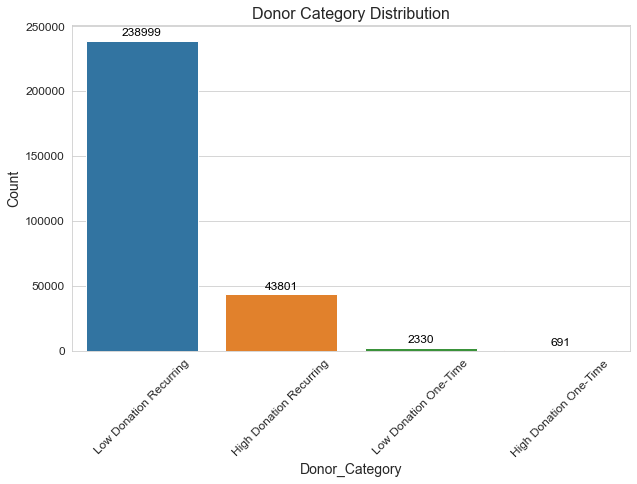

Low Donation Recurring     238999
High Donation Recurring     43801
Low Donation One-Time        2330
High Donation One-Time        691
Name: Donor_Category, dtype: int64

In [677]:
#Visualise the Donor category column
#Setting the figure size
plt.figure(figsize=(10, 6))

# Creating the count of the Donor_category
donor_category_counts = df['Donor_Category'].value_counts()

ax = sns.barplot(x=donor_category_counts.index, y=donor_category_counts.values)

# Customizing the plot
plt.title('Donor Category Distribution', fontsize=16)
plt.xlabel('Donor_Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding data labels

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',  # horizontal and vertical alignment
                fontsize=12, color='black',
                xytext=(0, 5), # offset from the top of the bar
                textcoords='offset points')
plt.show()


donor_category_counts

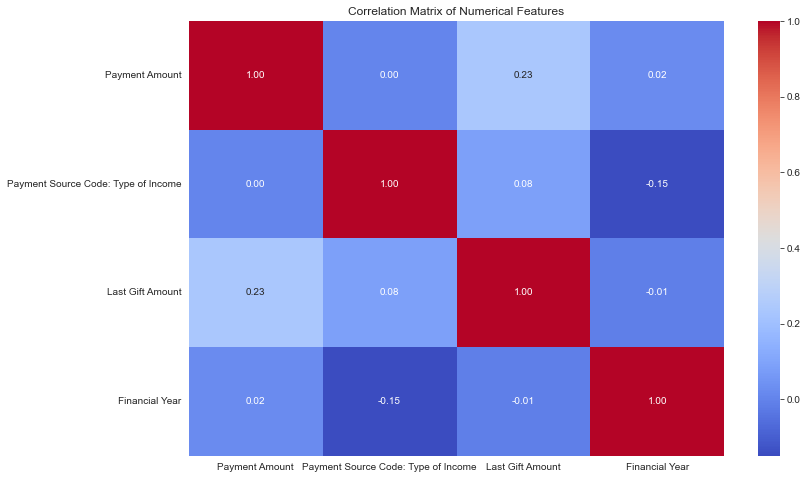

In [675]:
# Calculate the correlation matrix for numerical features in the dataset
correlation_matrix = income_donors_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature Engineering

In [678]:
# Create time-related features from the 'Payment Date' column
df_filtered['Year'] = df_filtered['Payment Date'].dt.year
df_filtered['Month'] = df_filtered['Payment Date'].dt.month
df_filtered['Day_of_Week'] = df_filtered['Payment Date'].dt.dayofweek

C:\Users\HP\AppData\Local\Temp\ipykernel_18504\2933202732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Payment Date'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_18504\2933202732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['Payment Date'].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_18504\2933202732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [679]:
# Create a 'Financial Year' column based on the 'Payment Date'
# Define a function to assign financial year
def financial_year(date):
    if date.month >= 9:
        return date.year + 1
    else:
        return date.year
df_filtered['Financial Year'] = df_filtered['Payment Date'].apply(financial_year)

# Display the first few rows of the dataset to confirm the new features
df_filtered[['Payment Date', 'Year', 'Month', 'Day_of_Week', 'Financial Year']].head()

C:\Users\HP\AppData\Local\Temp\ipykernel_18504\1169191333.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Financial Year'] = df_filtered['Payment Date'].apply(financial_year)


,Payment Date,Year,Month,Day_of_Week,Financial Year
0,2018-12-07,2018,12,4,2019
1,2017-04-05,2017,4,2,2017
2,2018-03-05,2018,3,0,2018
3,2016-10-05,2016,10,2,2017
4,2019-06-07,2019,6,4,2019


In [680]:
# Merge the donor metrics with the main dataset
df_merged = pd.merge(df_filtered, donor_data[['Salesforce Number', 'total_donation_amount', 'avg_donation_amount', 'donation_count']], on='Salesforce Number', how='left')

# Display the first few rows of the dataset to confirm the new features
df_merged[['Salesforce Number', 'total_donation_amount', 'avg_donation_amount', 'donation_count']].head()


,Salesforce Number,total_donation_amount,avg_donation_amount,donation_count
0,SF-025146,491.25,3.435315,143
1,SF-025146,491.25,3.435315,143
2,SF-025146,491.25,3.435315,143
3,SF-025146,491.25,3.435315,143
4,SF-025146,491.25,3.435315,143


In [681]:
# Create interaction features
df_merged['Amount_LastGift_Interaction'] = df_merged['Payment Amount'] * df_merged['Last Gift Amount']
df_merged['Amount_AvgDonation_Interaction'] = df_merged['Payment Amount'] * df_merged['avg_donation_amount']
df_merged['Amount_TotalDonation_Interaction'] = df_merged['Payment Amount'] * df_merged['total_donation_amount']

# Display the first few rows of the dataset to confirm the new interaction features
df_merged[['Payment Amount', 'Last Gift Amount', 'avg_donation_amount', 'total_donation_amount',
           'Amount_LastGift_Interaction', 'Amount_AvgDonation_Interaction', 'Amount_TotalDonation_Interaction']].head()

,Payment Amount,Last Gift Amount,avg_donation_amount,total_donation_amount,Amount_LastGift_Interaction,Amount_AvgDonation_Interaction,Amount_TotalDonation_Interaction
0,5.0,5.0,3.435315,491.25,25.0,17.176573,2456.25
1,5.0,5.0,3.435315,491.25,25.0,17.176573,2456.25
2,5.0,5.0,3.435315,491.25,25.0,17.176573,2456.25
3,5.0,5.0,3.435315,491.25,25.0,17.176573,2456.25
4,5.0,5.0,3.435315,491.25,25.0,17.176573,2456.25


In [682]:
df_filtered.describe()

,Payment Amount,Last Gift Amount,Year,Month,Day_of_Week,Financial Year
count,248495.000000,248495.000000,248495.000000,248495.000000,248495.000000,248495.000000
mean,5.607017,5.491522,2019.308203,6.678476,1.941987,2019.670211
std,4.931583,4.989113,1.912011,3.465583,1.377814,1.852059
min,-8.500000,-8.500000,2016.000000,1.000000,0.000000,2017.000000
25%,2.000000,2.500000,2018.000000,4.000000,1.000000,2018.000000
50%,5.000000,5.000000,2019.000000,7.000000,2.000000,2020.000000
75%,8.750000,8.000000,2021.000000,10.000000,3.000000,2021.000000
max,21.250000,21.250000,2023.000000,12.000000,6.000000,2023.000000


### Training and Test Set Split

In [704]:
from sklearn.model_selection import train_test_split

# Select features for the model
features = [
    'Financial Year', 'Month', 'Day_of_Week',
    'total_donation_amount', 'avg_donation_amount', 'donation_count',
    'Amount_LastGift_Interaction', 'Amount_AvgDonation_Interaction', 'Amount_TotalDonation_Interaction'
] + [col for col in df_merged.columns if 'Payment Source Code: Source Code_' in col or 'Payment Source Code: Type of Income_' in col or 'Contact Record Type_' in col or 'Gender_' in col or 'Recruitment Source.1_' in col]

# Select target variable for regression model
target_regression = 'Payment Amount'

# Select target variable for classification model
# We will create a simple binary classification based on whether a donation amount is above or below the median
df_merged['High_Low_Donation'] = (df_merged['Payment Amount'] >= df_merged['Payment Amount'].median()).astype(int)
target_classification = 'High_Low_Donation'

# Split the data into training and test sets for regression model 80% Training and 20% Testing data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df_merged[features], df_merged[target_regression], test_size=0.2, random_state=42)

# Split the data into training and test sets for classification model 80% Training and 20% Testing data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(df_merged[features], df_merged[target_classification], test_size=0.2, random_state=42)

# Display the shapes to confirm
X_train_reg.shape, X_test_reg.shape, X_train_clf.shape, X_test_clf.shape


((198796, 9), (49699, 9), (198796, 9), (49699, 9))

### Standardizing the Training and Test Split

In [721]:
sc = StandardScaler()
X_train_sclf = sc.fit_transform(X_train_clf)
X_test_sclf = sc.transform(X_test_clf)
X_train_sreg = sc.fit_transform(X_train_reg)
X_test_sreg = sc.transform(X_test_reg)

# REGRESSION MODELS

### LINEAR REGRESSION

In [722]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train_sreg, y_train_reg)

# Make predictions on the test data
y_pred_reg_linear = linear_reg.predict(X_test_sreg)

# Evaluate the model using RMSE, MAE, and R2
rmse_linear = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_linear))
mae_linear = mean_absolute_error(y_test_reg, y_pred_reg_linear)
r2_linear = r2_score(y_test_reg, y_pred_reg_linear)

print("Linear Regression Metrics")
print("RMSE: ", rmse_linear)
print("MAE: ", mae_linear)
print("R2 Score: ", r2_linear)

Linear Regression Metrics
RMSE:  1.9138525660088053
MAE:  1.526083027403904
R2 Score:  0.8488766780661903


### RANDOM FOREST REGRESSOR

In [723]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

# Train the model on the training data
random_forest_reg.fit(X_train_sreg, y_train_reg)

# Make predictions on the test data
y_pred_reg_rf = random_forest_reg.predict(X_test_sreg)

# Evaluate the model using RMSE, MAE, and R2
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_rf))
mae_rf = mean_absolute_error(y_test_reg, y_pred_reg_rf)
r2_rf = r2_score(y_test_reg, y_pred_reg_rf)

print("Random Forest Regressor Metrics")
print("RMSE: ", rmse_rf)
print("MAE: ", mae_rf)
print("R2 Score: ", r2_rf)

Random Forest Regressor Metrics
RMSE:  0.08884416828708103
MAE:  0.0038041825120559316
R2 Score:  0.9996743340253782


### GRADIENT BOOSTING REGRESSOR

In [724]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_reg.fit(X_train_sreg, y_train_reg)

# Make predictions on the test data
y_pred_reg_gb = gb_reg.predict(X_test_sreg)

# Evaluate the model using RMSE, MAE, and R2
rmse_gb = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_gb))
mae_gb = mean_absolute_error(y_test_reg, y_pred_reg_gb)
r2_gb = r2_score(y_test_reg, y_pred_reg_gb)


print("Gradient Boosting Regressor Metrics")
print("RMSE: ", rmse_gb)
print("MAE: ", mae_gb)
print("R2 Score: ", r2_gb)


Gradient Boosting Regressor Metrics
RMSE:  0.2948826738709687
MAE:  0.13684722963002355
R2 Score:  0.9964123254012744


## XG BOOST REGRESSOR

In [725]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor model
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Train the model on the training data
xgb_reg.fit(X_train_sreg, y_train_reg)

# Make predictions on the test data
y_pred_reg_xgb = xgb_reg.predict(X_test_sreg)

# Evaluate the model using RMSE, MAE, and R2
rmse_xgb = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_xgb))
mae_xgb = mean_absolute_error(y_test_reg, y_pred_reg_xgb)
r2_xgb = r2_score(y_test_reg, y_pred_reg_xgb)

# Print the evaluation metrics
print("XGBoost Regressor Metrics")
print("RMSE: ", rmse_xgb)
print("MAE: ", mae_xgb)
print("R2 Score: ", r2_xgb)

XGBoost Regressor Metrics
RMSE:  0.09937923145480834
MAE:  0.014663039720978434
R2 Score:  0.9995925204652564


## ARTIFICIAL NEURAL NETWORK FOR REGRESSION (DEEP LEARNING MODEL)

In [828]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Feature scaling
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_sreg)
X_test_reg_scaled = scaler.transform(X_test_sreg)

# Initialize the ANN model
ann_reg = Sequential()

# Add input layer and first hidden layer
ann_reg.add(Dense(units=32, activation='relu', input_dim=X_train_reg_scaled.shape[1]))

# Add second hidden layer
ann_reg.add(Dense(units=16, activation='relu'))

# Add output layer
ann_reg.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Compile the model
ann_reg.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
ann_reg.fit(X_train_reg_scaled, y_train_reg, epochs=10, batch_size=32)

# Make predictions
y_pred_reg_ann = ann_reg.predict(X_test_reg_scaled)

# Evaluate the model using RMSE, MAE, and R2
rmse_ann = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_ann))
mae_ann = mean_absolute_error(y_test_reg, y_pred_reg_ann)
r2_ann = r2_score(y_test_reg, y_pred_reg_ann)

# Print the evaluation metrics
print("ANN Regression Metrics")
print("RMSE: ", rmse_ann)
print("MAE: ", mae_ann)
print("R2 Score: ", r2_ann)

Epoch 1/10
6213/6213 [==============================] - 10s 1ms/step - loss: 1.6705
Epoch 2/10
6213/6213 [==============================] - 8s 1ms/step - loss: 0.0936
Epoch 3/10
6213/6213 [==============================] - 11s 2ms/step - loss: 0.0609
Epoch 4/10
6213/6213 [==============================] - 9s 1ms/step - loss: 0.0496
Epoch 5/10
6213/6213 [==============================] - 9s 1ms/step - loss: 0.0427
Epoch 6/10
6213/6213 [==============================] - 8s 1ms/step - loss: 0.0366
Epoch 7/10
6213/6213 [==============================] - 9s 1ms/step - loss: 0.0328
Epoch 8/10
6213/6213 [==============================] - 9s 1ms/step - loss: 0.0291
Epoch 9/10
6213/6213 [==============================] - 10s 2ms/step - loss: 0.0258
Epoch 10/10
1554/1554 [==============================] - 2s 1ms/step
ANN Regression Metrics
RMSE:  0.1537081109988784
MAE:  0.06339892984295292
R2 Score:  0.9990252166453029


## LSTM FOR REGRESSION - DEEP LEARNING MODEL

In [826]:
from tensorflow.keras.layers import LSTM, Flatten

# Reshape input data to 3D for LSTM: [samples, timesteps, features]
X_train_reg_reshaped = X_train_reg_scaled.reshape((X_train_reg_scaled.shape[0], 1, X_train_reg_scaled.shape[1]))
X_test_reg_reshaped = X_test_reg_scaled.reshape((X_test_reg_scaled.shape[0], 1, X_test_reg_scaled.shape[1]))

# Initialize the LSTM model
lstm_reg = Sequential()

# Add LSTM layer
lstm_reg.add(LSTM(50, activation='relu', input_shape=(X_train_reg_reshaped.shape[1], X_train_reg_reshaped.shape[2])))

# Add output layer
lstm_reg.add(Dense(1))

# Compile the model
lstm_reg.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_reg.fit(X_train_reg_reshaped, y_train_reg, epochs=10, batch_size=32)

# Make predictions
y_pred_reg_lstm = lstm_reg.predict(X_test_reg_reshaped)

# Evaluate the model using RMSE, MAE, and R2
rmse_ann = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_lstm))
mae_ann = mean_absolute_error(y_test_reg, y_pred_reg_lstm)
r2_ann = r2_score(y_test_reg, y_pred_reg_lstm)

# Print the evaluation metrics
print("LSTM Regression Metrics")
print("RMSE: ", rmse_lstm)
print("MAE: ", mae_lstm)
print("R2 Score: ", r2_lstm)

Epoch 1/10
6213/6213 [==============================] - 15s 2ms/step - loss: 2.1823
Epoch 2/10
6213/6213 [==============================] - 13s 2ms/step - loss: 0.0817
Epoch 3/10
6213/6213 [==============================] - 13s 2ms/step - loss: 0.0550
Epoch 4/10
6213/6213 [==============================] - 13s 2ms/step - loss: 0.0411
Epoch 5/10
6213/6213 [==============================] - 13s 2ms/step - loss: 0.0326
Epoch 6/10
6213/6213 [==============================] - 13s 2ms/step - loss: 0.0279
Epoch 7/10
6213/6213 [==============================] - 13s 2ms/step - loss: 0.0240
Epoch 8/10
6213/6213 [==============================] - 12s 2ms/step - loss: 0.0213
Epoch 9/10
6213/6213 [==============================] - 12s 2ms/step - loss: 0.0188
Epoch 10/10
1554/1554 [==============================] - 2s 1ms/step
LSTM Regression Metrics
RMSE:  0.12541808125369527
MAE:  0.04122303009831945
R2 Score:  0.9993510147317445


### Comparing the Regression Models performance

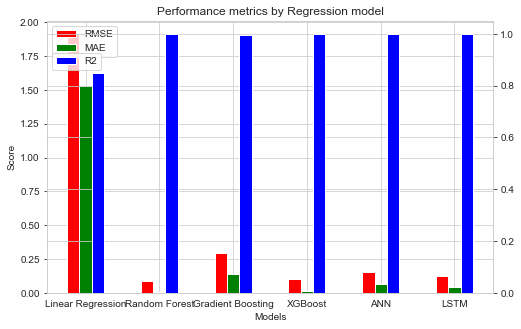

In [851]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
labels = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'ANN', 'LSTM']
rmse_values = [rmse_linear, rmse_rf, rmse_gb, rmse_xgb, rmse_ann, rmse_lstm]
mae_values = [mae_linear, mae_rf, mae_gb, mae_xgb, mae_ann, mae_lstm]
r2_values = [r2_linear, r2_rf, r2_gb, r2_xgb, r2_ann, r2_lstm]

# Plotting
x = np.arange(len(labels)) * 1.8  # Increase spacing between each model
width = 0.3  # Reduce the width of the bars

fig, ax1 = plt.subplots(figsize=(8, 5))  # Increase the size of the chart

ax2 = ax1.twinx()
ax1.bar(x - width, rmse_values, width, label='RMSE', color='r')
ax1.bar(x, mae_values, width, label='MAE', color='g')
ax2.bar(x + width, r2_values, width, label='R2', color='b')

ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.set_title('Performance metrics by Regression model')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

plt.show()

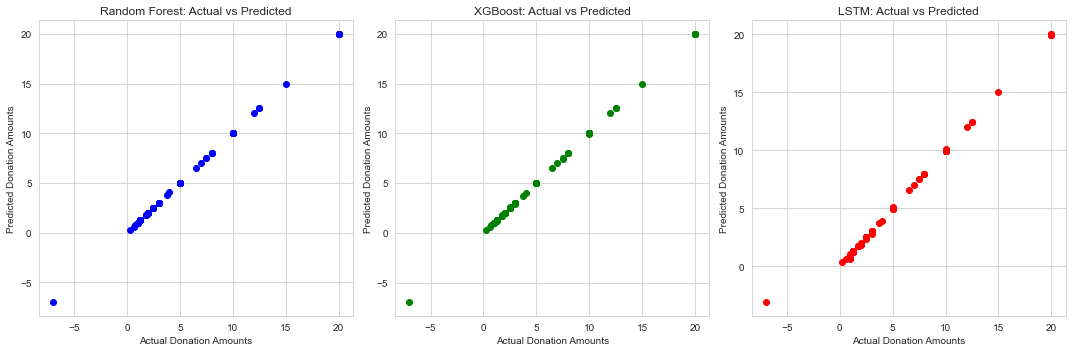

In [896]:
import matplotlib.pyplot as plt

# Sample actual and predicted values for visualization (taking first 100 samples for better visibility)
y_test_sample = y_test_reg[:100]
y_pred_rf_sample = y_pred_reg_rf[:100]
y_pred_xgb_sample = y_pred_reg_xgb[:100]
y_pred_lstm_sample = y_pred_reg_lstm[:100]

# Scatter plot for Random Forest
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test_sample, y_pred_rf_sample, color='blue')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Donation Amounts')
plt.ylabel('Predicted Donation Amounts')

# Scatter plot for XGBoost
plt.subplot(1, 3, 2)
plt.scatter(y_test_sample, y_pred_xgb_sample, color='green')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Donation Amounts')
plt.ylabel('Predicted Donation Amounts')

# Scatter plot for LSTM
plt.subplot(1, 3, 3)
plt.scatter(y_test_sample, y_pred_lstm_sample, color='red')
plt.title('LSTM: Actual vs Predicted')
plt.xlabel('Actual Donation Amounts')
plt.ylabel('Predicted Donation Amounts')

plt.tight_layout()
plt.show()

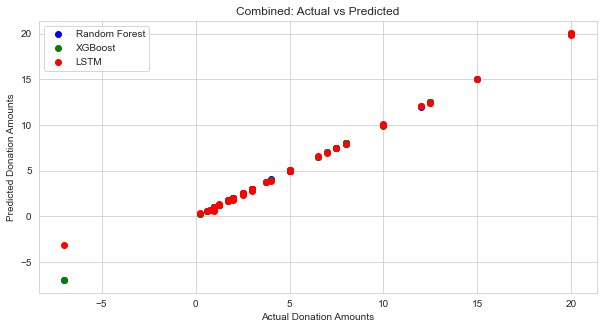

In [897]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_lstm_sample_reshaped = np.squeeze(y_pred_lstm_sample)
# Sample actual and predicted values for visualization (taking first 100 samples for better visibility)
y_test_sample = y_test_reg[:100]
y_pred_rf_sample = y_pred_reg_rf[:100]
y_pred_xgb_sample = y_pred_reg_xgb[:100]
y_pred_lstm_sample = y_pred_reg_lstm[:100]

# Scatter plot for all models
plt.figure(figsize=(10, 5))

# Combine all predictions and actual values for easy plotting
combined_actual = np.concatenate([y_test_sample, y_test_sample, y_test_sample])
combined_predicted = np.concatenate([y_pred_rf_sample, y_pred_xgb_sample, y_pred_lstm_sample_reshaped])


# Create a color list to distinguish between different models
colors = ['blue'] * len(y_test_sample) + ['green'] * len(y_test_sample) + ['red'] * len(y_test_sample)

# Create a label list to annotate different models
labels = ['Random Forest'] * len(y_test_sample) + ['XGBoost'] * len(y_test_sample) + ['LSTM'] * len(y_test_sample)

# Create scatter plot
for i in range(len(colors)):
    plt.scatter(combined_actual[i], combined_predicted[i], color=colors[i], label=labels[i] if i == 0 or labels[i] != labels[i-1] else "")

plt.title('Combined: Actual vs Predicted')
plt.xlabel('Actual Donation Amounts')
plt.ylabel('Predicted Donation Amounts')
plt.legend()
plt.show()

# CLASSIFICATION MODELS

## LOGISTIC REGRESSION

In [727]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Logistic Regression model
logistic_clf = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
logistic_clf.fit(X_train_sclf, y_train_clf)

# Make predictions on the test data
y_pred_clf_logistic = logistic_clf.predict(X_test_sclf)

# Evaluate the model
acc_logistic = accuracy_score(y_test_clf, y_pred_clf_logistic)
precision_logistic = precision_score(y_test_clf, y_pred_clf_logistic)
recall_logistic = recall_score(y_test_clf, y_pred_clf_logistic)
f1_logistic = f1_score(y_test_clf, y_pred_clf_logistic)
roc_auc_logistic = roc_auc_score(y_test_clf, y_pred_clf_logistic)

print("Logistic Regression Metrics:")
print(f"Accuracy: {acc_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1-Score: {f1_logistic}")
print(f"ROC-AUC: {roc_auc_logistic}")

Logistic Regression Metrics:
Accuracy: 0.9987323688605404
Precision: 0.998149827680029
Recall: 0.9995640485359296
F1-Score: 0.9988564375306311
ROC-AUC: 0.9986319769130737


## RANDOM FOREST CLASSIFIER

In [728]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
random_forest_clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
random_forest_clf.fit(X_train_sclf, y_train_clf)

# Make predictions on the test data
y_pred_clf_rf = random_forest_clf.predict(X_test_sclf)

# Evaluate the model
acc_rf = accuracy_score(y_test_clf, y_pred_clf_rf)
precision_rf = precision_score(y_test_clf, y_pred_clf_rf)
recall_rf = recall_score(y_test_clf, y_pred_clf_rf)
f1_rf = f1_score(y_test_clf, y_pred_clf_rf)
roc_auc_rf = roc_auc_score(y_test_clf, y_pred_clf_rf)


print("Random Forest Classifier Metrics:")
print(f"Accuracy: {acc_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")
print(f"ROC-AUC: {roc_auc_rf}")

Random Forest Classifier Metrics:
Accuracy: 0.9998189098372201
Precision: 0.9997820480220858
Recall: 0.9998910121339825
F1-Score: 0.9998365271092545
ROC-AUC: 0.9998102063781806


## GRADIENT BOOSTING CLASSIFIER

In [729]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_clf.fit(X_train_sclf, y_train_clf)

# Make predictions on the test data
y_pred_clf_gb = gb_clf.predict(X_test_sclf)

# Evaluate the model
acc_gb = accuracy_score(y_test_clf, y_pred_clf_gb)
precision_gb = precision_score(y_test_clf, y_pred_clf_gb)
recall_gb = recall_score(y_test_clf, y_pred_clf_gb)
f1_gb = f1_score(y_test_clf, y_pred_clf_gb)
roc_auc_gb = roc_auc_score(y_test_clf, y_pred_clf_gb)

print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {acc_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1-Score: {f1_gb}")
print(f"ROC-AUC: {roc_auc_gb}")

Gradient Boosting Classifier Metrics:
Accuracy: 0.9981488561138051
Precision: 0.9972810324825986
Recall: 0.999382402092567
F1-Score: 0.9983306115042643
ROC-AUC: 0.9979999549361496


## DECISION TREE CLASSIFIER

In [730]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_clf.fit(X_train_sclf, y_train_clf)

# Make predictions on the test data
y_pred_clf_dt = dt_clf.predict(X_test_sclf)

# Evaluate the model
acc_dt = accuracy_score(y_test_clf, y_pred_clf_dt)
precision_dt = precision_score(y_test_clf, y_pred_clf_dt)
recall_dt = recall_score(y_test_clf, y_pred_clf_dt)
f1_dt = f1_score(y_test_clf, y_pred_clf_dt)
roc_auc_dt = roc_auc_score(y_test_clf, y_pred_clf_dt)

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {acc_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-Score: {f1_dt}")
print(f"ROC-AUC: {roc_auc_dt}")

Decision Tree Classifier Metrics:
Accuracy: 0.9998189098372201
Precision: 0.9998183601554838
Recall: 0.9998546828453099
F1-Score: 0.9998365211705085
ROC-AUC: 0.9998145916819794


## NAIVE BAYES CLASSIFIER

In [731]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes Classifier model
nb_clf = GaussianNB()

# Train the model on the training data
nb_clf.fit(X_train_sclf, y_train_clf)

# Make predictions on the test data
y_pred_clf_nb = nb_clf.predict(X_test_sclf)

# Evaluate the model
acc_nb = accuracy_score(y_test_clf, y_pred_clf_nb)
precision_nb = precision_score(y_test_clf, y_pred_clf_nb)
recall_nb = recall_score(y_test_clf, y_pred_clf_nb)
f1_nb = f1_score(y_test_clf, y_pred_clf_nb)
roc_auc_nb = roc_auc_score(y_test_clf, y_pred_clf_nb)

print("Naive Bayes Classifier Metrics:")
print(f"Accuracy: {acc_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1-Score: {f1_nb}")
print(f"ROC-AUC: {roc_auc_nb}")


Naive Bayes Classifier Metrics:
Accuracy: 0.7701160989154712
Precision: 0.9455420886601361
Recall: 0.6206858969701373
F1-Score: 0.7494242789779582
ROC-AUC: 0.7881537995201112


## ARTIFICAL NEURAL NETWORK FOR CLASSIFICATION (DEEP LEARNING MODEL)

In [752]:
# Initialize the ANN model for classification
ann_clf = Sequential()

# Add input layer and first hidden layer
ann_clf.add(Dense(units=32, activation='relu', input_dim=X_train_sclf.shape[1]))

# Add second hidden layer
ann_clf.add(Dense(units=16, activation='relu'))

# Add output layer
ann_clf.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
ann_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_clf.fit(X_train_sclf, y_train_clf, epochs=10, batch_size=32)

# Make predictions
y_pred_clf_ann_prob = ann_clf.predict(X_test_sclf)
y_pred_clf_ann = (y_pred_clf_ann_prob > 0.5).astype(int)  # Threshold the predictions

# Evaluate the model
acc_ann = accuracy_score(y_test_clf, y_pred_clf_ann)
precision_ann = precision_score(y_test_clf, y_pred_clf_ann)
recall_ann = recall_score(y_test_clf, y_pred_clf_ann)
f1_ann = f1_score(y_test_clf, y_pred_clf_ann)
roc_auc_ann = roc_auc_score(y_test_clf, y_pred_clf_ann)

print("ANN Classification Metrics:")
print(f"Accuracy: {acc_ann}")
print(f"Precision: {precision_ann}")
print(f"Recall: {recall_ann}")
print(f"F1-Score: {f1_ann}")
print(f"ROC-AUC: {roc_auc_ann}")

Epoch 1/10
6213/6213 [==============================] - 19s 3ms/step - loss: 0.0475 - accuracy: 0.9828
Epoch 2/10
6213/6213 [==============================] - 14s 2ms/step - loss: 0.0065 - accuracy: 0.9988
Epoch 3/10
6213/6213 [==============================] - 15s 2ms/step - loss: 0.0051 - accuracy: 0.9990
Epoch 4/10
6213/6213 [==============================] - 15s 2ms/step - loss: 0.0043 - accuracy: 0.9991
Epoch 5/10
6213/6213 [==============================] - 16s 3ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 6/10
6213/6213 [==============================] - 17s 3ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 7/10
6213/6213 [==============================] - 15s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 8/10
6213/6213 [==============================] - 16s 3ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 9/10
6213/6213 [==============================] - 15s 2ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 10/10
1554/1554 [==============================] - 3s 2ms/step
ANN 

## LSTM FOR CLASSIFICATION (DEEP LEARNING MODEL)

In [832]:
# Feature scaling
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_sclf)
X_test_clf_scaled = scaler.transform(X_test_sclf)

# Reshape input data to 3D for LSTM: [samples, timesteps, features]
X_train_clf_reshaped = X_train_clf_scaled.reshape((X_train_clf.shape[0], 1, X_train_clf_scaled.shape[1]))
X_test_clf_reshaped = X_test_clf_scaled.reshape((X_test_clf.shape[0], 1, X_test_clf_scaled.shape[1]))

# Initialize the LSTM model for classification
lstm_clf = Sequential()

# Add LSTM layer
lstm_clf.add(LSTM(50, activation='relu', input_shape=(X_train_clf_reshaped.shape[1], X_train_clf_reshaped.shape[2])))

# Add output layer
lstm_clf.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
lstm_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_clf.fit(X_train_clf_reshaped, y_train_clf, epochs=10, batch_size=32)

# Make predictions using LSTM model
y_pred_clf_lstm_prob = lstm_clf.predict(X_test_clf_reshaped)
y_pred_clf_lstm = (y_pred_clf_lstm_prob > 0.5).astype(int)  # Threshold the predictions

# Evaluate the model
acc_lstm = accuracy_score(y_test_clf, y_pred_clf_lstm)
precision_lstm = precision_score(y_test_clf, y_pred_clf_lstm)
recall_lstm = recall_score(y_test_clf, y_pred_clf_lstm)
f1_lstm = f1_score(y_test_clf, y_pred_clf_lstm)
roc_auc_lstm = roc_auc_score(y_test_clf, y_pred_clf_lstm)

print("LSTM Classification Metrics:")
print(f"Accuracy: {acc_lstm}")
print(f"Precision: {precision_lstm}")
print(f"Recall: {recall_lstm}")
print(f"F1-Score: {f1_lstm}")
print(f"ROC-AUC: {roc_auc_lstm}")


Epoch 1/10
6213/6213 [==============================] - 15s 2ms/step - loss: 0.0745 - accuracy: 0.9744
Epoch 2/10
6213/6213 [==============================] - 17s 3ms/step - loss: 0.0102 - accuracy: 0.9984
Epoch 3/10
6213/6213 [==============================] - 16s 3ms/step - loss: 0.0072 - accuracy: 0.9987
Epoch 4/10
6213/6213 [==============================] - 15s 2ms/step - loss: 0.0059 - accuracy: 0.9990
Epoch 5/10
6213/6213 [==============================] - 15s 2ms/step - loss: 0.0049 - accuracy: 0.9990
Epoch 6/10
6213/6213 [==============================] - 14s 2ms/step - loss: 0.0041 - accuracy: 0.9992
Epoch 7/10
6213/6213 [==============================] - 14s 2ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 8/10
6213/6213 [==============================] - 14s 2ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 9/10
6213/6213 [==============================] - 14s 2ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 10/10
1554/1554 [==============================] - 2s 1ms/step
LSTM

### Comparing the Classification Models Performance

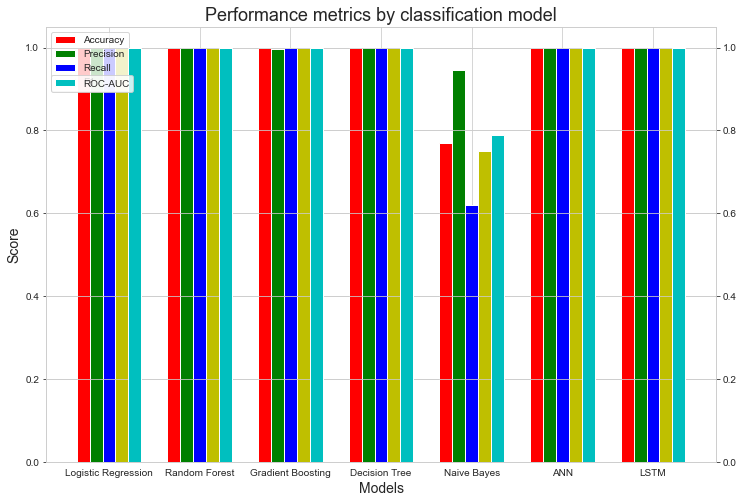

In [839]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'Naive Bayes', 'ANN', 'LSTM']
acc_values = [acc_logistic, acc_rf, acc_gb, acc_dt, acc_nb, acc_ann, acc_lstm]
precision_values = [precision_logistic, precision_rf, precision_gb, precision_dt, precision_nb, precision_ann, precision_lstm]
recall_values = [recall_logistic, recall_rf, recall_gb, recall_dt, recall_nb, recall_ann, recall_lstm]
f1_values = [f1_logistic, f1_rf, f1_gb, f1_dt, f1_nb, f1_ann, f1_ann]
roc_auc_values = [roc_auc_logistic, roc_auc_rf, roc_auc_gb, roc_auc_dt, roc_auc_nb, roc_auc_ann, roc_auc_lstm]

# Plotting
x = np.arange(len(labels)) * 0.7  # Increase spacing between each model
width = 0.1  # Reduce the width of the bars

fig, ax1 = plt.subplots(figsize=(12, 8))  # Increase the size of the chart

ax2 = ax1.twinx()
ax1.bar(x - 2*width, acc_values, width, label='Accuracy', color='r')
ax1.bar(x - width, precision_values, width, label='Precision', color='g')
ax1.bar(x, recall_values, width, label='Recall', color='b')
ax1.bar(x + width, f1_values, width, label='F1', color='y')
ax2.bar(x + 2*width, roc_auc_values, width, label='ROC-AUC', color='c')

ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Score', fontsize=14)
ax1.set_title('Performance metrics by classification model', fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=10)
ax1.legend(loc='upper left', bbox_to_anchor=(0,1))
ax2.legend(loc='upper left', bbox_to_anchor=(0,0.9))

plt.show()

In [898]:
# Check for Overfitting: Evaluate the model on the training data
y_pred_train_logistic = logistic_clf.predict(X_train_sclf)
y_pred_train_rf = random_forest_clf.predict(X_train_sclf)
y_pred_train_gb = gb_clf.predict(X_train_sclf)

# Calculate metrics for training data
acc_train_logistic = accuracy_score(y_train_clf, y_pred_train_logistic)
acc_train_rf = accuracy_score(y_train_clf, y_pred_train_rf)
acc_train_gb = accuracy_score(y_train_clf, y_pred_train_gb)

# Check for Class Imbalance: Look at the distribution of the target variable
class_distribution_train = y_train_clf.value_counts(normalize=True)
class_distribution_test = y_test_clf.value_counts(normalize=True)

acc_train_logistic, acc_train_rf, acc_train_gb, class_distribution_train, class_distribution_test

(0.9987409885826636,
 1.0,
 0.9987754820461523,
 1    0.553062
 0    0.446938
 Name: High_Low_Donation, dtype: float64,
 1    0.552925
 0    0.447075
 Name: High_Low_Donation, dtype: float64)